# A deep learning approach to observe the behaviour of employees towards punctuality at work

In this project we will implement three different classification algorithms from scratch. i.e. we implement all the mathematics invovled in these algorithms.  
    - Logistic Regression
    - Neural Network (One hidden layer)
    - Deep Learning Neural Network (At least two hidden layers)
   
At the end of the project, we compare the performance of three different models and will use different optimization techniques to further improve the performance. 

We will also implement the Deep Learning Neural Network in Tensorflow, as Tensorflow is one of the most widely used deep learning framework. 

We will also use these models implemented in library sklearn and compare the performance of our implementation from scratch to these buildin functions. 

After the implementation of algorithms along with different optimization techniques, we will further analyze our data and will understand different features and see what are the most important features that is effecting employees to have excessive number of hours absent from work and how we can build a model to reduce its impact. 


## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [data_utils] has different functions to load data, analyze data and different other visualization functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import sklearn
import sklearn.linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn_utils import *

## 2 - Analysis of Dataset ##

Let's get more familiar with the dataset. 

We will load 60% data to train, 20% data to dev/validation and 20% data to test. In the implementation dev and validation are used interchangeably and both mean the same set. We also bring the matrix into the order to be processed by our algorithm. For example in the original data, we have all features in different columns and the last column is the result. In the rearrangement we bring all the features to a single column, so that we have all the features of the first training example in the first column, all the features of the second training example in the seond column and so on. The result is stored in a horizantal vector, where each column represent the result of the training samples.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that we substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. Let's standardize our dataset.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, n_features, ...)
- Reshape the datasets such that each example is now a vector of size (n_features, 1)
- We place all vectora of examples and stack them vertical into a single matrix
- "Standardize" the data
</font>

In [2]:
file = 'dataset/Absenteeism_at_work.csv'

# Load the dataset as DataFrame in Pandas and then convert to matrix
#data = load_dataset(file)
df = pd.read_csv(file)
print('Shape of dataset is:{}'.format(df.shape))
print('Type of features is:\n{}'.format(df.dtypes))

Shape of dataset is:(740, 22)
Type of features is:
ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
Absenteeism category                 int64
dty

our data is not balanced. To bring it into balanced, we should use SMOTE


In [3]:
col = 'Absenteeism category'
data = sample_data(df, col)


Shape of X: (740, 21)
Shape of y: (740, 1)
Before OverSampling, counts of label '1': [272]
Before OverSampling, counts of label '0': [468] 

After OverSampling, the shape of X: (936, 21)
After OverSampling, the shape of y: (936, 1) 

After OverSampling, counts of label '1': [468]
After OverSampling, counts of label '0': [468]
Size of the whole data after over sampling (936, 22)


In [4]:
# Randomly distribute data into training, testing and validation classes. We use 60-20-20 distribution
un_training_x, training_y, un_testing_x, testing_y, un_validation_x, validation_y = split_random(data, percent_train=60, percent_test=20)

# Lets normalize our X data
training_x, testing_x, validation_x = normalize_data(un_training_x, un_testing_x, un_validation_x)

# We can print the X data, to be sure that we have the normalized data in the range of -1 to 1
print("X:")
print_normalized_data(training_x, testing_x, validation_x)
print("__________________________________")


# Lets print the Y class, to be sure that we have a mix of positive and negative class
print("Y")
print_normalized_data(training_y, testing_y, validation_y)
print("__________________________________")

percent_train 60
percent_test 20
percent_validation 20
Number of training examples: m_train = 561
Number of testing examples: m_test = 187
Number of validation examples: m_validation = 188
Number of features: n_features = 21
training_x shape (21, 561)
training_y shape (1, 561)
testing_x shape (21, 187)
testing_y shape (1, 187)
validation_x shape (21, 188)
validation_y shape (1, 188)
Original Data:
[[18.  1.  7. ... 25.  8.  1.]
 [12. 12.  2. ... 21.  3.  0.]
 [16. 23.  3. ... 25.  8.  1.]
 ...
 [ 1.  1.  5. ... 29.  8.  1.]
 [34. 28.  7. ... 28.  4.  0.]
 [ 2.  0.  6. ... 33.  0.  0.]]
____________________________________________________________
X:
Training:

[[1.84650808e-03 1.23100538e-03 1.64134051e-03 ... 1.88505149e-03
  2.46201077e-03 2.27346150e-03]
 [9.33897494e-05 1.12067699e-03 2.14796424e-03 ... 1.38330175e-03
  2.14796424e-03 8.02363163e-04]
 [1.91812936e-03 5.48036961e-04 8.22055441e-04 ... 3.28822176e-03
  5.48036961e-04 2.46616632e-03]
 ...
 [1.88528806e-03 1.84385316e-0

## 3 - Logistic Regression ##

In [30]:
clf = sklearn.linear_model.LogisticRegressionCV(penalty='l2', solver='lbfgs', max_iter=1000, verbose=1.0,);
print(clf.fit(training_x.T, training_y.T.reshape(training_x.shape[1],)))

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=1.0)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


In [6]:
#print("weights between input and first hidden layer:")
#print(clf.coefs_[1].shape)
#w = clf.coefs_[0][: , :1]
#print(w*100)
#w = clf.coefs_[0][: , 99:]
#print(w*100)
#print(training_x.shape)
#print(np.sum(w*10))
#print('Type of features is:\n{}'.format(df.dtypes))

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Train accuracy:  96.61319073083779
Dev accuracy:  87.76595744680851
Test accuracy:  96.79144385026738
Confusion matrix of Testing Data:
[[86  5]
 [ 1 95]]


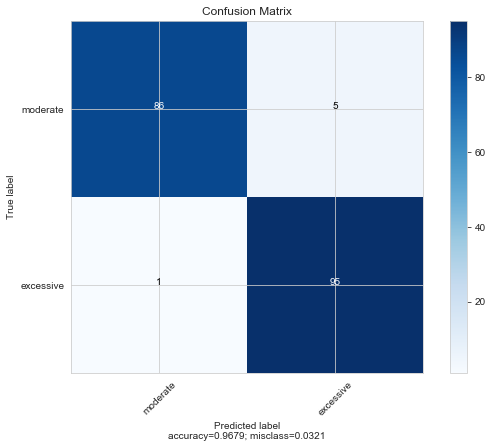

Classification Report:
             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97        91
        1.0       0.95      0.99      0.97        96

avg / total       0.97      0.97      0.97       187

Precision score: 0.9687380908476243
Recall score: 0.9679144385026738
F1 Score: 0.9678813302644858
Logistic Regression


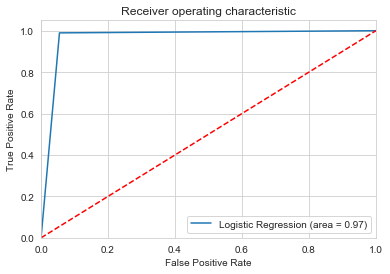

In [31]:
acc_dic = {}
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "lr_sklearn", None, clf, acc_dic)

In [8]:
## plot the cost
#plt.plot(clf.loss_curve_)
#plt.ylabel('cost')
#plt.xlabel('iterations (per tens)')
#plt.title("Learning rate =" + str(0.01))
#plt.show()

## 4 - Classification of data with one hidden layer Neural Network ##

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100], learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=40, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.0, verbose=False,
       warm_start=False)
[array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 

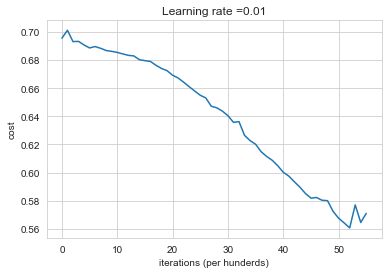

In [9]:
from sklearn.neural_network import MLPClassifier
lr=0.01
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100], learning_rate='adaptive',
       learning_rate_init=lr, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=40, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.0, verbose=False,
       warm_start=False)
    
n_features = training_x.T.shape[0]
print(clf.fit(training_x.T, training_y.T.reshape(n_features,)))

pred = clf.predict(testing_x.T)
print([pred])

# plot the cost
plt.plot(clf.loss_curve_)
plt.ylabel('cost')
plt.xlabel('iterations (per hunderds)')
plt.title("Learning rate =" + str(lr))
plt.show()

Train accuracy:  66.48841354723707
Dev accuracy:  65.42553191489361
Test accuracy:  77.54010695187165
Confusion matrix of Testing Data:
[[53 38]
 [ 4 92]]


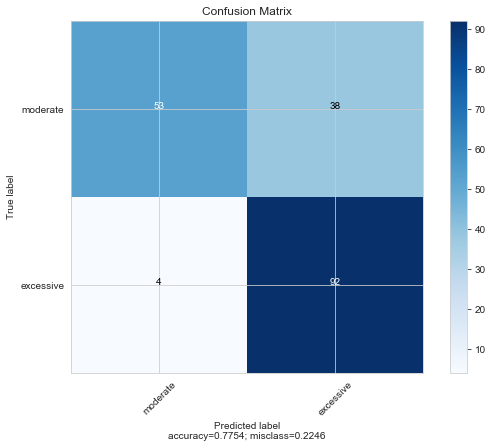

Classification Report:
             precision    recall  f1-score   support

        0.0       0.93      0.58      0.72        91
        1.0       0.71      0.96      0.81        96

avg / total       0.82      0.78      0.77       187

Precision score: 0.8157887520116622
Recall score: 0.7754010695187166
F1 Score: 0.7664971535351548
Shallow Neural Network


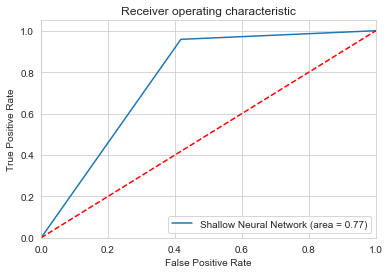

In [10]:
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "nn_sklearn", None, clf, acc_dic)

In [11]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50, 100, 200]
for i, j in enumerate(hidden_layer_sizes):
    clf = MLPClassifier(hidden_layer_sizes = [j], activation='tanh', solver='adam', beta_1=0.9,
                    beta_2=0.999, max_iter=1000, verbose=0, alpha=0.001, learning_rate_init=0.01, 
                    learning_rate='adaptive')
    n_features = training_x.T.shape[0]
    clf.fit(training_x.T, training_y.T.reshape(n_features,))
    print ("Accuracy for {} hidden units:".format(j))
    print("Train accuracy: ", compute_accuracy(clf.predict(training_x.T), training_y))
    print("Dev accuracy: ", compute_accuracy(clf.predict(validation_x.T), validation_y))
    print("Test accuracy: ", compute_accuracy(clf.predict(testing_x.T), testing_y))
    print()



Accuracy for 1 hidden units:
Train accuracy:  52.228163992869874
Dev accuracy:  42.02127659574468
Test accuracy:  51.336898395721924

Accuracy for 2 hidden units:
Train accuracy:  53.11942959001782
Dev accuracy:  46.808510638297875
Test accuracy:  56.68449197860962

Accuracy for 3 hidden units:
Train accuracy:  52.228163992869874
Dev accuracy:  42.02127659574468
Test accuracy:  51.336898395721924

Accuracy for 4 hidden units:
Train accuracy:  52.228163992869874
Dev accuracy:  42.02127659574468
Test accuracy:  51.336898395721924

Accuracy for 5 hidden units:
Train accuracy:  52.228163992869874
Dev accuracy:  47.340425531914896
Test accuracy:  55.61497326203209

Accuracy for 20 hidden units:
Train accuracy:  77.36185383244207
Dev accuracy:  73.93617021276596
Test accuracy:  81.28342245989305

Accuracy for 50 hidden units:
Train accuracy:  47.77183600713012
Dev accuracy:  62.234042553191486
Test accuracy:  55.080213903743314

Accuracy for 100 hidden units:
Train accuracy:  80.392156862745

## 5 - A Deep Neural Network Model ##


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[200, 100, 50, 10, 5], learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=40, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.0, verbose=False,
       warm_start=False)
Train accuracy:  94.6524064171123
Dev accuracy:  67.5531914893617
Test accuracy:  76.47058823529412
Confusion matrix of Testing Data:
[[59 32]
 [12 84]]


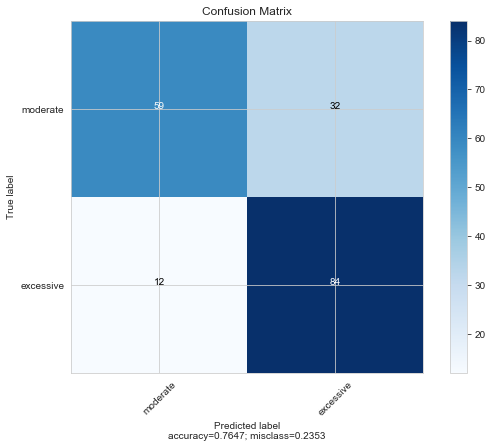

Classification Report:
             precision    recall  f1-score   support

        0.0       0.83      0.65      0.73        91
        1.0       0.72      0.88      0.79        96

avg / total       0.78      0.76      0.76       187

Precision score: 0.7761334742736337
Recall score: 0.7647058823529411
F1 Score: 0.7612803332374178
Deep Neural Network


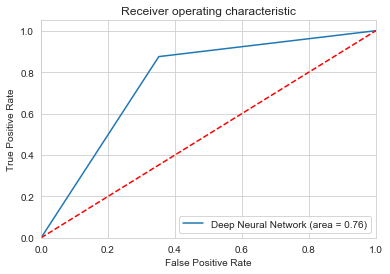

In [27]:
from sklearn.neural_network import MLPClassifier
lr = 0.001
clf = MLPClassifier(hidden_layer_sizes = [200, 100, 50, 10, 5], activation='relu', 
                    alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       learning_rate='adaptive',
       learning_rate_init=lr, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=40, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.0, verbose=False,
       warm_start=False)
print(clf.fit(training_x.T, training_y.T.ravel()))


acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "dnn_sklearn", None, clf, acc_dic)

In [18]:
# plot the cost
plt.plot(clf.loss_curve_)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(0.01))
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

learning rate is: 0.01
Train accuracy:  47.77183600713012
Dev accuracy:  57.97872340425532
Test accuracy:  48.66310160427807

-------------------------------------------------------

learning rate is: 0.001
Train accuracy:  52.228163992869874
Dev accuracy:  42.02127659574468
Test accuracy:  51.336898395721924

-------------------------------------------------------

learning rate is: 0.0001
Train accuracy:  52.228163992869874
Dev accuracy:  42.02127659574468
Test accuracy:  51.336898395721924

-------------------------------------------------------



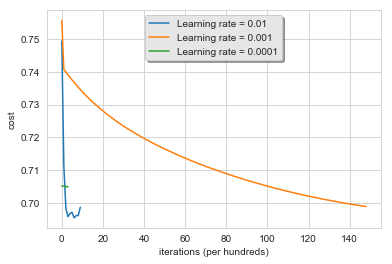

In [20]:
learning_rates = [0.01, 0.001, 0.0001] 
models = {}

for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = MLPClassifier(hidden_layer_sizes = [200, 150, 100, 50, 10, 5], activation='relu', solver='adam', beta_1=0.9,
                    beta_2=0.999, max_iter=1000, verbose=0, alpha=0.01, learning_rate_init=i, 
                    learning_rate='adaptive').fit(training_x.T, training_y.T.ravel())
    print("Train accuracy: ", compute_accuracy(models[str(i)].predict(training_x.T), training_y))
    print("Dev accuracy: ", compute_accuracy(models[str(i)].predict(validation_x.T), validation_y))
    print("Test accuracy: ", compute_accuracy(models[str(i)].predict(testing_x.T), testing_y))
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)].loss_curve_), label= "Learning rate = " + str(i))

plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
#plt.savefig('./results/{}.pdf'.format(file))
plt.show()

In [21]:
#print("weights between input and first hidden layer:")
#print(clf.coefs_[0])
#print("\nweights between first hidden and second hidden layer:")
#print(clf.coefs_[1])

print("Training set score: %f" % clf.score(training_x.T, training_y.T))
print("Test set score: %f" % clf.score(training_x.T, training_y.T))

result = clf.predict(testing_x.T)
#print(result)
print(clf.loss_)

Training set score: 0.919786
Test set score: 0.919786
0.20883720914478413


(3, 6)
[[96.61319073 87.76595745 96.79144385  0.96873809  0.96791444  0.96788133]
 [66.48841355 65.42553191 77.54010695  0.81578875  0.77540107  0.76649715]
 [94.65240642 67.55319149 76.47058824  0.77613347  0.76470588  0.76128033]]
[[96.61319073 87.76595745 96.79144385]
 [66.48841355 65.42553191 77.54010695]
 [94.65240642 67.55319149 76.47058824]]
[[0.96873809 0.96791444 0.96788133]
 [0.81578875 0.77540107 0.76649715]
 [0.77613347 0.76470588 0.76128033]]



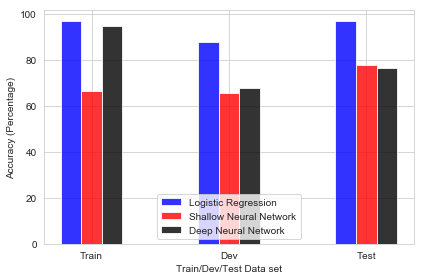

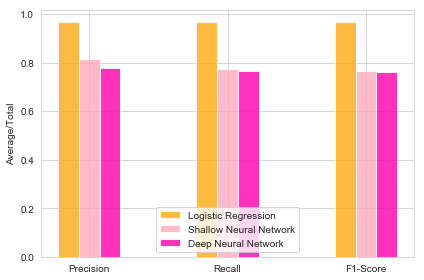

In [28]:
#print(acc_dic)
show_barchart(acc_dic)